<a href="https://colab.research.google.com/github/holoho/ai_14_section1/blob/main/AI_14_%EC%9D%B4%EB%8F%99%EA%B7%9C_section2_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [128]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score

In [130]:
df = pd.read_csv("/content/drive/MyDrive/MH11.csv")

In [131]:
df.columns

Index(['date', 'social isolation', 'stress', 'bereavement', 'healthcare',
       'mental illness', 'anixety', 'fears', 'tiredness', 'symptoms',
       'mental health', 'depression', 'panic attack', 'insomnia', 'loneliness',
       'mental disorder awareness'],
      dtype='object')

In [132]:
df

,date,social isolation,stress,bereavement,healthcare,mental illness,anixety,fears,tiredness,symptoms,mental health,depression,panic attack,insomnia,loneliness,mental disorder awareness
0,2019-01-20 00:00:00,0,41,1,43,3,0,3,1,79,7,62,6,15,7,0
1,2019-01-20 01:00:00,0,33,3,40,3,0,2,0,74,5,66,11,15,4,0
2,2019-01-20 02:00:00,0,35,1,38,7,0,2,0,76,7,79,4,18,2,0
3,2019-01-20 03:00:00,0,32,1,34,6,0,2,1,81,5,78,7,19,7,0
4,2019-01-20 04:00:00,0,39,1,32,8,0,3,1,76,6,74,7,21,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13117,2022-02-12 23:00:00,0,41,1,42,6,0,2,0,82,8,74,6,24,3,0
13118,2022-02-13 00:00:00,1,45,3,34,7,0,2,0,80,8,68,6,23,8,0
13119,2022-02-13 00:00:00,1,45,3,34,7,0,2,0,80,8,72,6,25,8,0
13120,2022-02-13 00:00:00,1,45,3,34,7,0,2,0,81,8,68,6,23,8,0


In [133]:
df['Date'] = pd.to_datetime(df['date']).dt.date 

In [134]:
df.head()

,date,social isolation,stress,bereavement,healthcare,mental illness,anixety,fears,tiredness,symptoms,mental health,depression,panic attack,insomnia,loneliness,mental disorder awareness,Date
0,2019-01-20 00:00:00,0,41,1,43,3,0,3,1,79,7,62,6,15,7,0,2019-01-20
1,2019-01-20 01:00:00,0,33,3,40,3,0,2,0,74,5,66,11,15,4,0,2019-01-20
2,2019-01-20 02:00:00,0,35,1,38,7,0,2,0,76,7,79,4,18,2,0,2019-01-20
3,2019-01-20 03:00:00,0,32,1,34,6,0,2,1,81,5,78,7,19,7,0,2019-01-20
4,2019-01-20 04:00:00,0,39,1,32,8,0,3,1,76,6,74,7,21,2,0,2019-01-20


In [135]:
df1 = df.reset_index(drop=True)

In [136]:
df1 = df1.drop(['anixety','date'], axis=1)

In [137]:
df1.head()

,social isolation,stress,bereavement,healthcare,mental illness,fears,tiredness,symptoms,mental health,depression,panic attack,insomnia,loneliness,mental disorder awareness,Date
0,0,41,1,43,3,3,1,79,7,62,6,15,7,0,2019-01-20
1,0,33,3,40,3,2,0,74,5,66,11,15,4,0,2019-01-20
2,0,35,1,38,7,2,0,76,7,79,4,18,2,0,2019-01-20
3,0,32,1,34,6,2,1,81,5,78,7,19,7,0,2019-01-20
4,0,39,1,32,8,3,1,76,6,74,7,21,2,0,2019-01-20


In [138]:
df_d = df1.groupby(['Date','mental disorder awareness']).mean()
df_d = df_d[['social isolation', 'stress', 'bereavement', 'healthcare',
       'mental illness', 'fears', 'tiredness', 'symptoms', 'mental health',
       'depression', 'panic attack', 'insomnia', 'loneliness']].reset_index()
df_d.shape

(691, 15)

In [139]:

#df_monthly = df.groupby(['Day', 'Year', 'Month', 'mental disorder awareness']).mean()
#df_monthly = df_monthly[['social isolation', 'stress', 'bereavement', 'healthcare',
#       'mental illness', 'anixety', 'fears', 'tiredness', 'symptoms',
#       'mental health', 'depression', 'panic attack', 'insomnia', 'loneliness']].reset_index()
#
#df_monthly.shape

In [140]:
dfs = pd.read_csv("/content/drive/MyDrive/MH2.csv", index_col='date', parse_dates=True)
dfs

,symptoms,mental health,social isolation,stress,bereavement,healthcare,mental illness,depression,panic attack,insomnia,loneliness,mental disorder awareness
date,,,,,,,,,,,,
2019-01-20 00:00:00,32,3,0,41,1,43,3,65,6,15,7,0
2019-01-20 01:00:00,29,2,0,33,3,42,3,67,11,15,4,0
2019-01-20 02:00:00,31,3,0,36,1,39,7,78,4,19,2,0
2019-01-20 03:00:00,32,2,0,33,1,35,6,79,6,19,8,0
2019-01-20 04:00:00,30,2,0,40,1,32,8,73,7,21,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-21 23:00:00,48,5,1,54,2,38,7,71,5,13,9,0
2020-11-22 00:00:00,50,3,0,55,2,43,9,68,7,22,1,0
2020-11-22 00:00:00,50,3,0,60,2,47,10,68,7,22,1,0


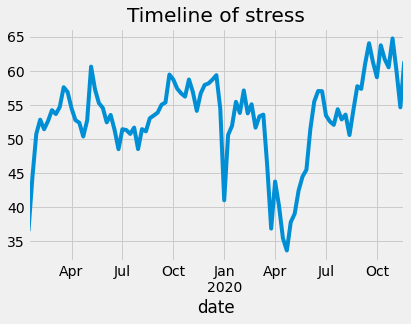

In [141]:
plt.style.use('fivethirtyeight')
plt.title('Timeline of stress')
dfs['stress'].resample('W').mean().plot()

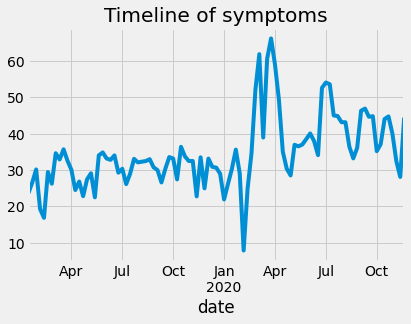

In [142]:
plt.style.use('fivethirtyeight')
plt.title('Timeline of symptoms')
dfs['symptoms'].resample('W').mean().plot()

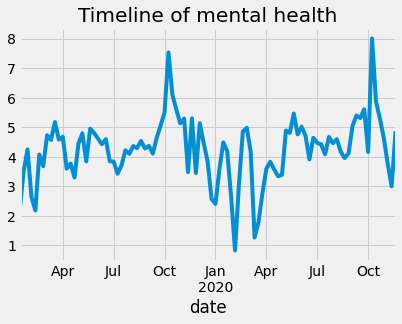

In [143]:
plt.style.use('fivethirtyeight')
plt.title('Timeline of mental health')
dfs['mental health'].resample('W').mean().plot()

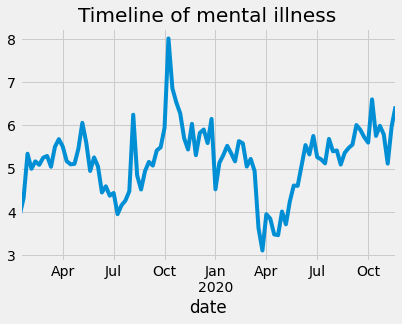

In [144]:
plt.style.use('fivethirtyeight')
plt.title('Timeline of mental illness')
dfs['mental illness'].resample('W').mean().plot()

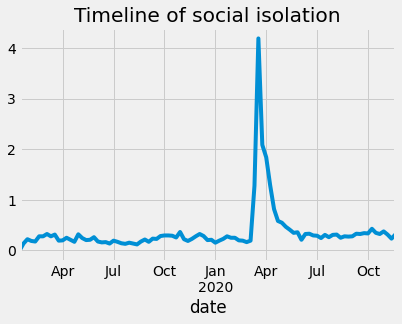

In [145]:
plt.style.use('fivethirtyeight')
plt.title("Timeline of social isolation")
dfs['social isolation'].resample('W').mean().plot()

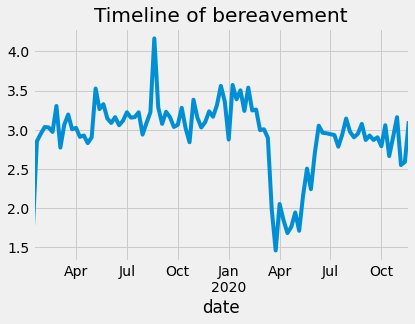

In [146]:
plt.style.use('fivethirtyeight')
plt.title("Timeline of bereavement")
dfs['bereavement'].resample('W').mean().plot()

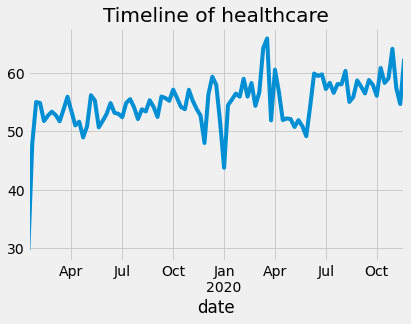

In [147]:
plt.style.use('fivethirtyeight')
plt.title("Timeline of healthcare")
dfs['healthcare'].resample('W').mean().plot()

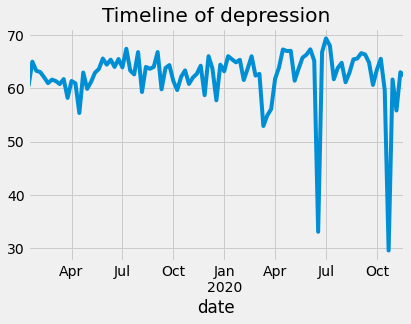

In [148]:
plt.style.use('fivethirtyeight')
plt.title("Timeline of depression")
dfs['depression'].resample('W').mean().plot()

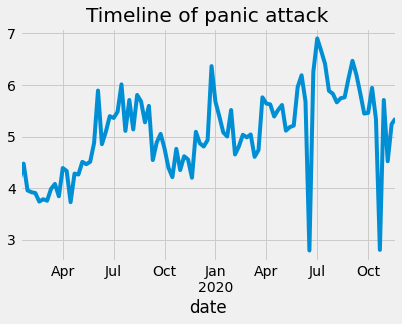

In [149]:
plt.style.use('fivethirtyeight')
plt.title("Timeline of panic attack")
dfs['panic attack'].resample('W').mean().plot()

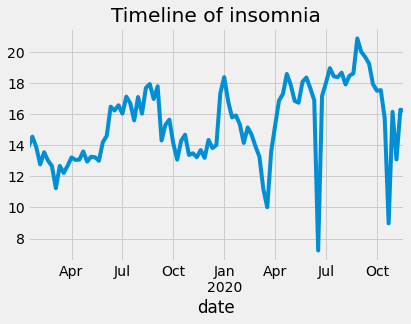

In [150]:
plt.style.use('fivethirtyeight')
plt.title("Timeline of insomnia")
dfs['insomnia'].resample('W').mean().plot()

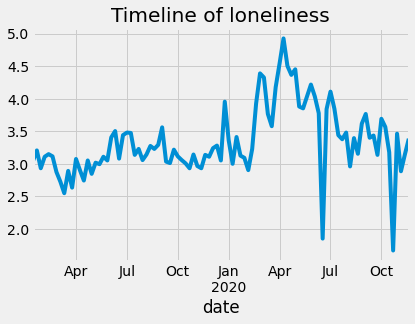

In [151]:
plt.style.use('fivethirtyeight')
plt.title("Timeline of loneliness")
dfs['loneliness'].resample('W').mean().plot()

In [152]:
dfs.describe()

,symptoms,mental health,social isolation,stress,bereavement,healthcare,mental illness,depression,panic attack,insomnia,loneliness,mental disorder awareness
count,16797.000000,16797.000000,16797.000000,16797.000000,16797.000000,16797.000000,16797.000000,16797.000000,16797.00000,16797.000000,16797.000000,16797.000000
mean,34.856224,4.266774,0.363577,53.154135,2.950289,55.144490,5.214979,62.385486,5.07412,15.404298,3.344347,0.013395
std,13.221810,1.905601,0.713504,10.980552,1.545713,20.065311,2.427647,16.355294,2.42109,5.605530,1.566732,0.114963
min,3.000000,0.000000,0.000000,21.000000,0.000000,11.000000,0.000000,13.000000,0.00000,2.000000,0.000000,0.000000
25%,26.000000,3.000000,0.000000,45.000000,2.000000,39.000000,3.000000,50.000000,3.00000,11.000000,2.000000,0.000000
50%,33.000000,4.000000,0.000000,53.000000,3.000000,51.000000,5.000000,63.000000,5.00000,15.000000,3.000000,0.000000
75%,42.000000,5.000000,1.000000,61.000000,4.000000,72.000000,7.000000,75.000000,6.00000,19.000000,4.000000,0.000000
max,100.000000,25.000000,9.000000,99.000000,17.000000,100.000000,19.000000,100.000000,17.00000,100.000000,14.000000,1.000000


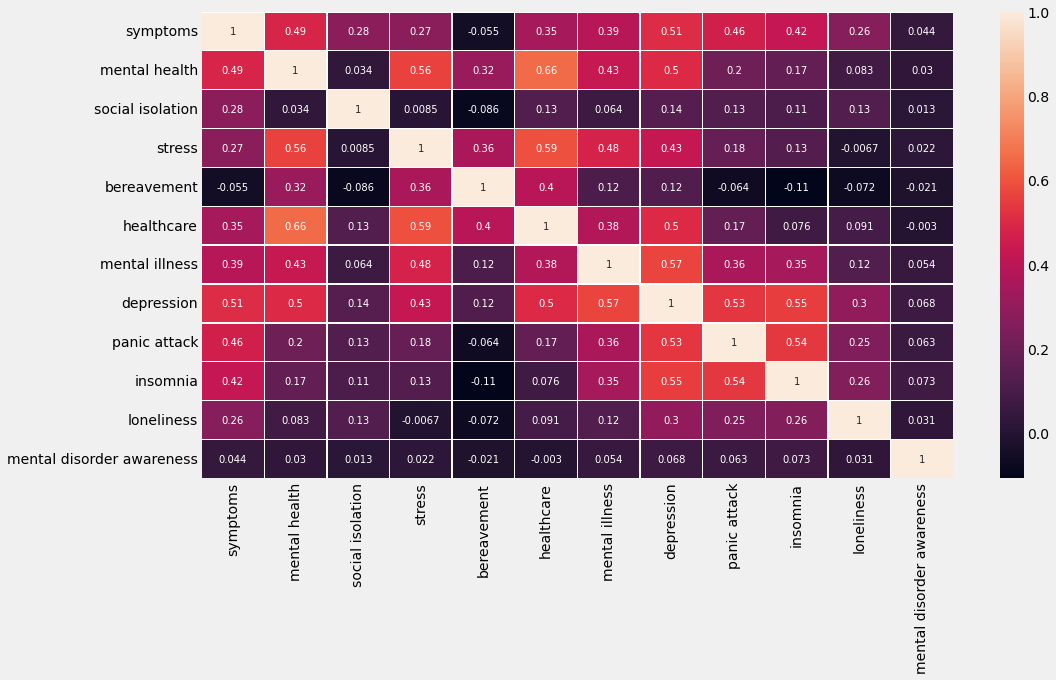

In [153]:
# Import seaborn library
import seaborn as sns

# Get correlation matrix of the meat DataFrame
corr = dfs.corr(method='spearman')

plt.figure(figsize = (15,8))
# Customize the heatmap of the corr_meat correlation matrix
sns.heatmap(corr,
            annot=True,
            linewidths=0.4,
            annot_kws={"size": 10})

plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

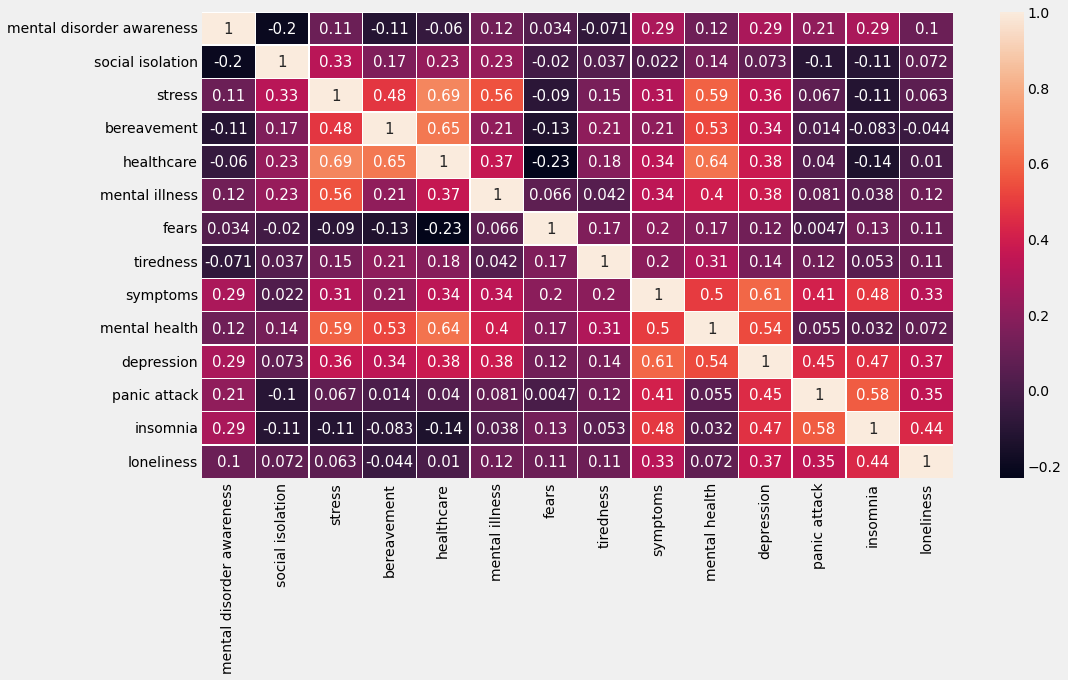

In [154]:
corr1 = df_d.corr(method='spearman')

plt.figure(figsize = (15,8))
# Customize the heatmap of the corr_meat correlation matrix
sns.heatmap(corr1,
            annot=True,
            linewidths=0.4,
            annot_kws={"size": 15})

plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

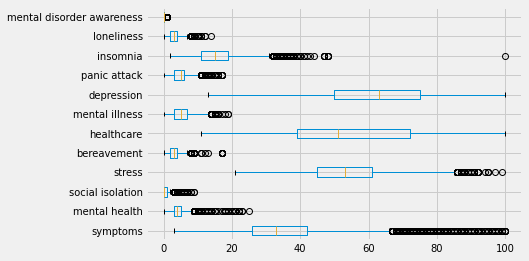

In [155]:
dfs.boxplot(fontsize=10, vert=False)
plt.show()

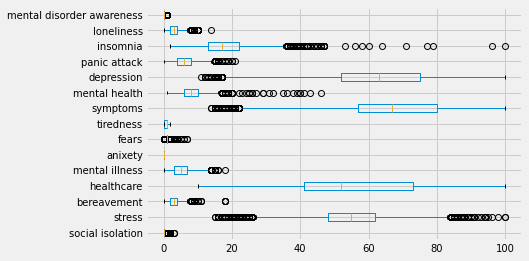

In [156]:
df.boxplot(fontsize=10, vert=False)
plt.show()

In [157]:
df1

,social isolation,stress,bereavement,healthcare,mental illness,fears,tiredness,symptoms,mental health,depression,panic attack,insomnia,loneliness,mental disorder awareness,Date
0,0,41,1,43,3,3,1,79,7,62,6,15,7,0,2019-01-20
1,0,33,3,40,3,2,0,74,5,66,11,15,4,0,2019-01-20
2,0,35,1,38,7,2,0,76,7,79,4,18,2,0,2019-01-20
3,0,32,1,34,6,2,1,81,5,78,7,19,7,0,2019-01-20
4,0,39,1,32,8,3,1,76,6,74,7,21,2,0,2019-01-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13117,0,41,1,42,6,2,0,82,8,74,6,24,3,0,2022-02-12
13118,1,45,3,34,7,2,0,80,8,68,6,23,8,0,2022-02-13
13119,1,45,3,34,7,2,0,80,8,72,6,25,8,0,2022-02-13
13120,1,45,3,34,7,2,0,81,8,68,6,23,8,0,2022-02-13


In [158]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

%matplotlib inline

In [159]:
df11 = df.reset_index()

In [160]:
df11

,index,date,social isolation,stress,bereavement,healthcare,mental illness,anixety,fears,tiredness,symptoms,mental health,depression,panic attack,insomnia,loneliness,mental disorder awareness,Date
0,0,2019-01-20 00:00:00,0,41,1,43,3,0,3,1,79,7,62,6,15,7,0,2019-01-20
1,1,2019-01-20 01:00:00,0,33,3,40,3,0,2,0,74,5,66,11,15,4,0,2019-01-20
2,2,2019-01-20 02:00:00,0,35,1,38,7,0,2,0,76,7,79,4,18,2,0,2019-01-20
3,3,2019-01-20 03:00:00,0,32,1,34,6,0,2,1,81,5,78,7,19,7,0,2019-01-20
4,4,2019-01-20 04:00:00,0,39,1,32,8,0,3,1,76,6,74,7,21,2,0,2019-01-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13117,13117,2022-02-12 23:00:00,0,41,1,42,6,0,2,0,82,8,74,6,24,3,0,2022-02-12
13118,13118,2022-02-13 00:00:00,1,45,3,34,7,0,2,0,80,8,68,6,23,8,0,2022-02-13
13119,13119,2022-02-13 00:00:00,1,45,3,34,7,0,2,0,80,8,72,6,25,8,0,2022-02-13
13120,13120,2022-02-13 00:00:00,1,45,3,34,7,0,2,0,81,8,68,6,23,8,0,2022-02-13


In [161]:
import plotly.express as px
fig = px.line(df_d, x="Date", y=['symptoms', 'mental health', 'social isolation', 'stress', 'bereavement', 'healthcare'], title='Keyword Web Search Interest Over Time')
fig.show()

In [162]:
fig1 = px.line(df_d, x="Date", y=['mental illness', 'depression','panic attack', 'insomnia', 'loneliness'], title='Keyword Web Search Interest Over Time')
fig1.show()

In [163]:
features = ['social isolation', 'stress', 'bereavement', 'healthcare','mental illness', 'fears', 'tiredness', 'symptoms',
'mental health', 'depression', 'panic attack', 'insomnia', 'loneliness']
label = ['mental disorder awareness']
test_df = df11[df11['date'] >= '2021-12-01 01:00:00']
train_df = df11[df11['date'] < '2021-12-01 01:00:00']
X_train, y_train = train_df[features], train_df[label]
X_test, y_test = test_df[features], test_df[label]

In [164]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
reg = XGBRegressor(n_estimators=500, learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric='mae')

[04:12:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-mae:0.495332	validation_1-mae:0.49538
[1]	validation_0-mae:0.490733	validation_1-mae:0.490806
[2]	validation_0-mae:0.486092	validation_1-mae:0.486277
[3]	validation_0-mae:0.481567	validation_1-mae:0.481795
[4]	validation_0-mae:0.477031	validation_1-mae:0.477357
[5]	validation_0-mae:0.472638	validation_1-mae:0.472957
[6]	validation_0-mae:0.468243	validation_1-mae:0.468602
[7]	validation_0-mae:0.463916	validation_1-mae:0.464295
[8]	validation_0-mae:0.459547	validation_1-mae:0.460026
[9]	validation_0-mae:0.455245	validation_1-mae:0.455806
[10]	validation_0-mae:0.451021	validation_1-mae:0.451623
[11]	validation_0-mae:0.446834	validation_1-mae:0.447487
[12]	validation_0-mae:0.442708	validation_1-mae:0.443385
[13]	validation_0-mae:0.438567	validation_1-mae:0.439326
[14]	validation_0-mae:0.434534	validation_1-mae:0.435313
[15]	validation_0-mae:0.43048

XGBRegressor(learning_rate=0.01, n_estimators=500)

In [165]:
predictions = reg.predict(X_test)

In [166]:
test_df = test_df.reset_index().drop('index', axis=1)
test_df['predictions'] = pd.Series(predictions)

In [167]:
test_df

,level_0,date,social isolation,stress,bereavement,healthcare,mental illness,anixety,fears,tiredness,symptoms,mental health,depression,panic attack,insomnia,loneliness,mental disorder awareness,Date,predictions
0,12947,2022-02-06 00:00:00,0,40,2,41,7,0,2,1,73,8,63,6,26,4,0,2022-02-06,0.029364
1,12948,2022-02-06 00:00:00,0,40,2,41,7,0,2,1,73,8,64,6,26,4,0,2022-02-06,0.029364
2,12949,2022-02-06 00:00:00,0,40,2,41,7,0,2,1,84,9,63,6,26,4,0,2022-02-06,0.030820
3,12950,2022-02-06 00:00:00,0,40,2,41,7,0,2,1,84,9,64,6,26,4,0,2022-02-06,0.030820
4,12951,2022-02-06 01:00:00,0,46,6,45,6,0,3,0,89,7,66,5,20,6,0,2022-02-06,0.034865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,13117,2022-02-12 23:00:00,0,41,1,42,6,0,2,0,82,8,74,6,24,3,0,2022-02-12,0.029448
171,13118,2022-02-13 00:00:00,1,45,3,34,7,0,2,0,80,8,68,6,23,8,0,2022-02-13,0.028268
172,13119,2022-02-13 00:00:00,1,45,3,34,7,0,2,0,80,8,72,6,25,8,0,2022-02-13,0.028268
173,13120,2022-02-13 00:00:00,1,45,3,34,7,0,2,0,81,8,68,6,23,8,0,2022-02-13,0.028268


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


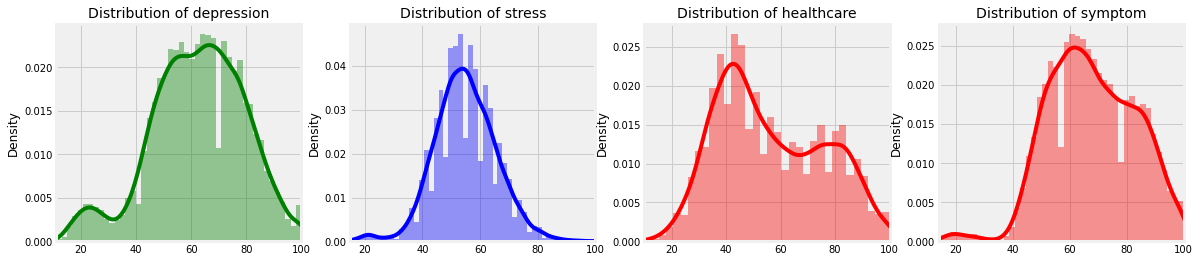

In [168]:
fig, ax = plt.subplots(1, 4, figsize=(18,4))

depression_val = df11['depression'].values
stress_val = df11['stress'].values
healthcare_val = df11['healthcare'].values
symptom_val = df11['symptoms'].values

sns.distplot(depression_val, ax=ax[0], color='g')
ax[0].set_title('Distribution of depression', fontsize=14)
ax[0].set_xlim([min(depression_val), max(depression_val)])

sns.distplot(stress_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of stress', fontsize=14)
ax[1].set_xlim([min(stress_val), max(stress_val)])

sns.distplot(healthcare_val, ax=ax[2], color='r')
ax[2].set_title('Distribution of healthcare', fontsize=14)
ax[2].set_xlim([min(healthcare_val), max(healthcare_val)])

sns.distplot(symptom_val, ax=ax[3], color='r')
ax[3].set_title('Distribution of symptom', fontsize=14)
ax[3].set_xlim([min(symptom_val), max(symptom_val)])

plt.show()

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


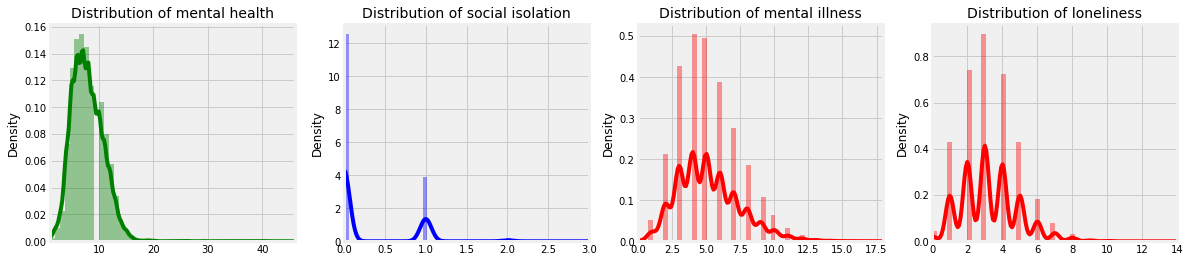

In [169]:
fig, ax = plt.subplots(1, 4, figsize=(18,4))

mh_val = df11['mental health'].values
si_val = df11['social isolation'].values
mi_val = df11['mental illness'].values
ll_val = df11['loneliness'].values

sns.distplot(mh_val, ax=ax[0], color='g')
ax[0].set_title('Distribution of mental health', fontsize=14)
ax[0].set_xlim([min(mh_val), max(mh_val)])

sns.distplot(si_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of social isolation', fontsize=14)
ax[1].set_xlim([min(si_val), max(si_val)])

sns.distplot(mi_val, ax=ax[2], color='r')
ax[2].set_title('Distribution of mental illness', fontsize=14)
ax[2].set_xlim([min(mi_val), max(mi_val)])

sns.distplot(ll_val, ax=ax[3], color='r')
ax[3].set_title('Distribution of loneliness', fontsize=14)
ax[3].set_xlim([min(ll_val), max(ll_val)])

plt.show()

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Ple

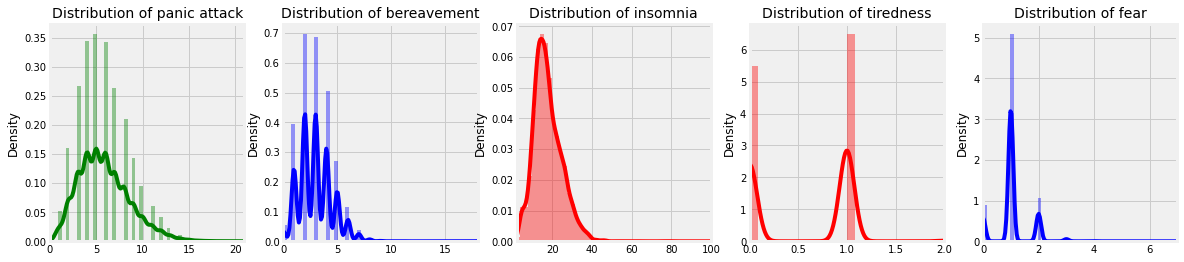

In [170]:
fig, ax = plt.subplots(1, 5, figsize=(18,4))

pa_val = df11['panic attack'].values
be_val = df11['bereavement'].values
in_val = df11['insomnia'].values
tired_val = df11['tiredness'].values
fear_val = df11['fears'].values

sns.distplot(pa_val, ax=ax[0], color='g')
ax[0].set_title('Distribution of panic attack', fontsize=14)
ax[0].set_xlim([min(pa_val), max(pa_val)])

sns.distplot(be_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of bereavement', fontsize=14)
ax[1].set_xlim([min(be_val), max(be_val)])

sns.distplot(in_val, ax=ax[2], color='r')
ax[2].set_title('Distribution of insomnia', fontsize=14)
ax[2].set_xlim([min(in_val), max(in_val)])

sns.distplot(tired_val, ax=ax[3], color='r')
ax[3].set_title('Distribution of tiredness', fontsize=14)
ax[3].set_xlim([min(tired_val), max(tired_val)])

sns.distplot(fear_val, ax=ax[4], color='b')
ax[4].set_title('Distribution of fear', fontsize=14)
ax[4].set_xlim([min(fear_val), max(fear_val)])

plt.show()

In [171]:
df1['mental disorder awareness'].value_counts(normalize=True)

0    0.98331
1    0.01669
Name: mental disorder awareness, dtype: float64

In [172]:
df1.nunique().sort_values(ascending=False)

Date                         532
healthcare                    91
depression                    90
symptoms                      86
stress                        84
insomnia                      56
mental health                 37
panic attack                  22
mental illness                18
bereavement                   13
loneliness                    12
fears                          8
social isolation               4
tiredness                      3
mental disorder awareness      2
dtype: int64

Baseline Accuracy: 0.983310470964792


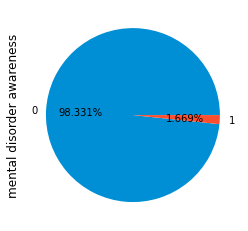

In [173]:
target = "mental disorder awareness"
df1[target].value_counts(normalize=True).plot.pie(autopct="%.3f%%")
print("Baseline Accuracy:", df1[target].value_counts(normalize=True).max())

In [174]:
# mental disorder awareness count
mda_count_0, mda_count_1 = df1['mental disorder awareness'].value_counts()

# divide mental disorder awareness
mda_0 = df1[df1['mental disorder awareness'] == 0]
mda_1 = df1[df1['mental disorder awareness'] == 1]

print('mda 0:', mda_0.shape)
print('mda 1:', mda_1.shape)

mda 0: (12903, 15)
mda 1: (219, 15)


In [175]:
!pip3 install imbalanced-learn
!pip install -q imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [176]:
df1.shape

(13122, 15)

In [177]:
X = df1.drop(['mental disorder awareness','Date'], axis=1)
y= df1['mental disorder awareness']

X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [178]:
from sklearn.metrics import accuracy_score
major = y1_train.mode()[0]
basic_model = [major] * len(y1_train)
print("training accuracy: ", accuracy_score(y1_train, basic_model))

training accuracy:  0.9833285700676384


In [179]:
model =  LogisticRegression()

model.fit(X, y)

y_predict = model.predict(X)
accuracy_score(y_predict, y)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.9830056393842402

In [180]:
X2_train = X1_train.values
X2_test = X1_test.values
y2_train = y1_train.values
y2_test = y1_test.values

from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score

SVC(class_weight='balanced', probability = True).fit(X2_train, y2_train)
training_score = cross_val_score(SVC(class_weight='balanced', probability = True), X2_train, y2_train, cv=5)
print("Classifiers: SVC Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers: SVC Has a training score of 56.00000000000001 % accuracy score


In [181]:
from sklearn.model_selection import GridSearchCV

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X2_train, y2_train)

# SVC best estimator
svc = grid_svc.best_estimator_

In [182]:
svc_score = cross_val_score(svc, X2_train, y2_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

Support Vector Classifier Cross Validation Score 98.33%


In [183]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

svc_pred = cross_val_predict(svc, X2_train, y2_train, cv=5,
                             method="decision_function")

In [184]:
from sklearn.metrics import roc_auc_score

print('Support Vector Classifier: ', roc_auc_score(y2_train, svc_pred)) # fail

Support Vector Classifier:  0.5680062003487696


In [185]:
import imblearn
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)

# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(X, y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({0: 12903, 1: 219})
Resample dataset shape Counter({0: 219, 1: 219})


Baseline Accuracy: 0.5


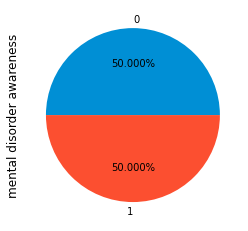

In [186]:
y_rus.value_counts(normalize=True).plot.pie(autopct="%.3f%%")
print("Baseline Accuracy:", y_rus.value_counts(normalize=True).max())

In [187]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_rus, y_rus, test_size =0.20, random_state=42)
from xgboost import XGBClassifier
m = XGBClassifier()
m.fit(x_train1, y_train1)
predict_y = m.predict(x_test1)

print('ROCAUC score:',roc_auc_score(y_test1, predict_y))
print('Accuracy score:',accuracy_score(y_test1, predict_y))
print('F1 score:',f1_score(y_test1, predict_y))

ROCAUC score: 0.6393357550596782
Accuracy score: 0.6363636363636364
F1 score: 0.6363636363636364


In [188]:
# load library
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='majority')

# fit predictor and target variable
x_tl, y_tl = tl.fit_resample(X, y)

print('Original dataset shape:', Counter(y))
print('Resample dataset shape:', Counter(y_tl))

Original dataset shape: Counter({0: 12903, 1: 219})
Resample dataset shape: Counter({0: 12836, 1: 219})


In [189]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_tl, y_tl, test_size =0.20, random_state=42)
from xgboost import XGBClassifier
m = XGBClassifier()
m.fit(x_train1, y_train1)
predict_y = m.predict(x_test1)

print('ROCAUC score:',roc_auc_score(y_test1, predict_y))
print('Accuracy score:',accuracy_score(y_test1, predict_y))
print('F1 score:',f1_score(y_test1, predict_y))

ROCAUC score: 0.5
Accuracy score: 0.9816162389888932
F1 score: 0.0


In [190]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

# fit the predictor and target
rfc.fit(X1_train, y1_train)

# predict
rfc_predict = rfc.predict(X1_test)

In [191]:
print('ROCAUC score:',roc_auc_score(y1_test, rfc_predict))
print('Accuracy score:',accuracy_score(y1_test, rfc_predict))
print('F1 score:',f1_score(y1_test, rfc_predict))

ROCAUC score: 0.5340909090909091
Accuracy score: 0.9843809523809524
F1 score: 0.1276595744680851


In [192]:
from imblearn.ensemble import RUSBoostClassifier
rusboost = RUSBoostClassifier(n_estimators=200, algorithm='SAMME.R',
                              random_state=0)
rusboost.fit(X1_train, y1_train)  

y_pred = rusboost.predict(X1_test)
print('ROCAUC score:',roc_auc_score(y1_test, y_pred))
print('Accuracy score:',accuracy_score(y1_test, y_pred))
print('F1 score:',f1_score(y1_test, y_pred))

ROCAUC score: 0.5387226585889895
Accuracy score: 0.729904761904762
F1 score: 0.04059539918809202


In [193]:
from imblearn.under_sampling import NearMiss

nm = NearMiss()

x_nm, y_nm = nm.fit_resample(X, y)

print('Original dataset shape:', Counter(y))
print('Resample dataset shape:', Counter(y_nm))

Original dataset shape: Counter({0: 12903, 1: 219})
Resample dataset shape: Counter({0: 219, 1: 219})


In [194]:
# roc score 가장 좋기에 선택
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_nm, y_nm, test_size =0.20, random_state=42)
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(
    XGBClassifier(n_estimators = 1000, n_jobs=-1, random_state=10,  oob_score=True)
)


pipe.fit(x_train1, y_train1)
predict_y = pipe.predict(x_test1)

print('ROCAUC score:',roc_auc_score(y_test1, predict_y))
print('Accuracy score:',accuracy_score(y_test1, predict_y))
print('F1 score:',f1_score(y_test1, predict_y))

ROCAUC score: 0.7457187337830826
Accuracy score: 0.75
F1 score: 0.7179487179487181


In [195]:
import eli5
from eli5.sklearn import PermutationImportance
from eli5 import show_weights

perm = PermutationImportance(pipe, scoring="balanced_accuracy", n_iter=5, random_state=2)
perm.fit(x_test1, y_test1)
show_weights(perm, feature_names=x_test1.columns.tolist())

Weight,Feature
0.0355 ± 0.0620,stress
0.0339 ± 0.0112,symptoms
0.0239 ± 0.0419,insomnia
0.0165 ± 0.0457,healthcare
0.0106 ± 0.0283,depression
0.0039 ± 0.0238,loneliness
0.0036 ± 0.0166,mental illness
0.0021 ± 0.0085,social isolation
0 ± 0.0000,tiredness
-0.0067 ± 0.0448,mental health


Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


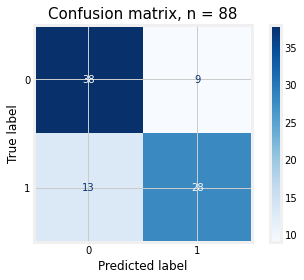

In [196]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe, x_test1, y_test1,
                            cmap=plt.cm.Blues,
                            ax=ax)
plt.title(f'Confusion matrix, n = {len(y_test1)}', fontsize=15)
plt.show()

In [197]:
from sklearn.metrics import classification_report
print(classification_report(y_test1, predict_y))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78        47
           1       0.76      0.68      0.72        41

    accuracy                           0.75        88
   macro avg       0.75      0.75      0.75        88
weighted avg       0.75      0.75      0.75        88



In [198]:
y_pred_proba = pipe.predict_proba(x_test1)[:, 1]
y_pred_proba

array([4.52957898e-02, 2.30273709e-01, 9.99909401e-01, 9.75324512e-01,
       9.99994397e-01, 9.44522321e-01, 3.02913389e-03, 9.88948941e-01,
       9.63048816e-01, 9.01046157e-01, 2.36181449e-02, 7.79824436e-01,
       9.68105376e-01, 9.98842180e-01, 9.91787985e-02, 2.20721550e-02,
       9.79361713e-01, 1.64204091e-03, 2.79396512e-02, 8.55499413e-04,
       1.47171304e-01, 9.93426442e-02, 8.28855097e-01, 9.97330427e-01,
       3.52225360e-03, 1.59779549e-01, 1.14860326e-01, 9.77860868e-01,
       1.26680970e-01, 1.18122473e-02, 2.70745698e-02, 4.38670158e-01,
       9.86870960e-04, 9.79555547e-01, 9.29945648e-01, 9.23103595e-04,
       4.40642297e-01, 7.41294399e-02, 4.40722285e-03, 9.95878816e-01,
       9.91400540e-01, 9.81619954e-01, 6.99227501e-04, 9.46923159e-04,
       5.39906137e-03, 1.43305433e-03, 3.47479694e-02, 9.99459922e-01,
       2.33057188e-04, 8.66750658e-01, 9.77721930e-01, 1.08835036e-02,
       1.58929918e-02, 1.59790739e-01, 1.69915110e-01, 3.02562088e-01,
      

In [199]:
pred_proba = pd.DataFrame({
    'y_test': y_test1,
    'pred_proba': y_pred_proba})
pred_proba

,y_test,pred_proba
364,1,0.045296
78,0,0.230274
278,1,0.999909
391,1,0.975325
436,1,0.999994
...,...,...
57,0,0.000290
137,0,0.174255
24,0,0.170109
17,0,0.829777


In [200]:
fpr, tpr, thresholds = roc_curve(y_test1, y_pred_proba)

roc = pd.DataFrame({
    'FPR(Fall-out)': fpr, 
    'TPRate(Recall)': tpr, 
    'Threshold': thresholds
})
roc

,FPR(Fall-out),TPRate(Recall),Threshold
0,0.000000,0.000000,1.999994
1,0.000000,0.024390,0.999994
2,0.000000,0.146341,0.997330
3,0.021277,0.146341,0.996976
4,0.021277,0.243902,0.991401
5,0.042553,0.243902,0.988949
6,0.042553,0.268293,0.987418
7,0.063830,0.268293,0.981620
8,0.063830,0.658537,0.866751
9,0.170213,0.658537,0.701777


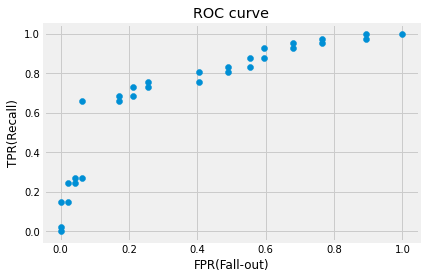

In [201]:
plt.scatter(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)');

In [202]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test1, y_pred_proba)
auc_score

0.806434872859367

In [203]:
from sklearn.metrics import accuracy_score
major = y_train1.mode()[0]
basic_model = [major] * len(y_train1)
print("training accuracy: ", accuracy_score(y_train1, basic_model))

training accuracy:  0.5085714285714286


In [204]:
fpr, tpr, thresholds = roc_curve(y_test1, predict_y)
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=1.000000, G-mean=0.743


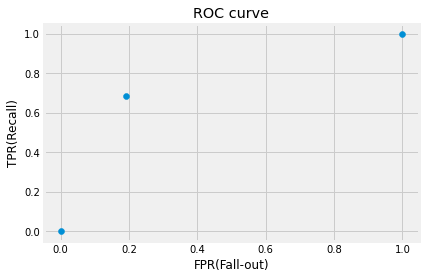

In [205]:
plt.scatter(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)');

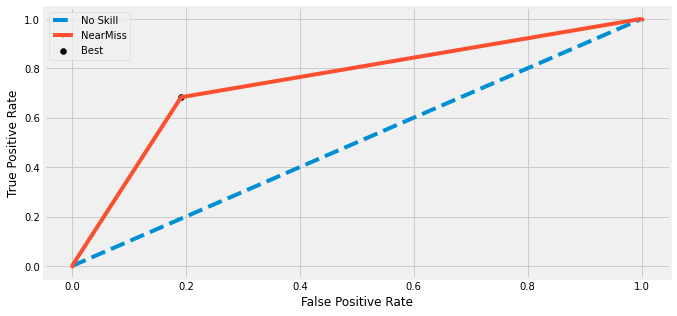

In [206]:
plt.figure(figsize=(10,5))
plt.plot([0,1], [0,1], linestyle='--', label='No Skill') 

plt.plot(fpr, tpr, marker='.', label='NearMiss') 
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best') 
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [207]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, f1_score
precision, recall, thresholds = precision_recall_curve(y_test1, predict_y)

#Calculate f-Score
fscore = (2 * precision * recall) / (precision + recall)

# locate the index of the largest g-mean
ix = np.argmax(fscore)

print('Best Threshold=%f, G-mean=%.3f' % (thresholds[ix], fscore[ix]))

Best Threshold=1.000000, G-mean=0.718


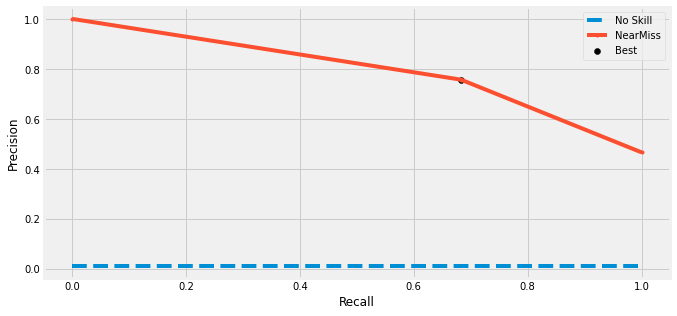

In [208]:
no_skill = len([y_test1==1]) / len(y_test1)

plt.figure(figsize=(10,5))
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill') 
plt.plot(recall, precision, marker='.', label='NearMiss') 
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best') 
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

In [209]:
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

thresholds = np.arange(0, 1, 0.001)

scores = [f1_score(y_test1,to_labels(predict_y, t)) for t in thresholds]

ix = np.argmax(scores)
print('Threshold=%.3f, F-measure=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.001, F-measure=0.71795


In [210]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import RepeatedStratifiedKFold
model = SVC(gamma='scale', class_weight='balanced')

calibrated = CalibratedClassifierCV(model, method='isotonic', cv=3)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)


scores = cross_val_score(calibrated, X, y, scoring='roc_auc', cv=cv, n_jobs=-1) 
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.703


In [211]:
from imblearn.ensemble import BalancedRandomForestClassifier

model = BalancedRandomForestClassifier(n_estimators=20)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)


scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1) 
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.699


In [212]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

calibrated = CalibratedClassifierCV(model)

param_grid = dict(cv=[2,3,4], method=['sigmoid','isotonic'])


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid = GridSearchCV(estimator=calibrated, param_grid=param_grid, n_jobs=-1, cv=cv,
scoring='roc_auc')

grid_result = grid.fit(X, y)


print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_)) # report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, stdev, param))

Best: 0.558132 using {'cv': 4, 'method': 'isotonic'}
0.547165 (0.057314) with: {'cv': 2, 'method': 'sigmoid'}
0.548216 (0.041336) with: {'cv': 2, 'method': 'isotonic'}
0.510139 (0.061142) with: {'cv': 3, 'method': 'sigmoid'}
0.555613 (0.044735) with: {'cv': 3, 'method': 'isotonic'}
0.554509 (0.054893) with: {'cv': 4, 'method': 'sigmoid'}
0.558132 (0.052175) with: {'cv': 4, 'method': 'isotonic'}


In [213]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

# fit predictor and target variable
x_ros, y_ros = ros.fit_resample(X, y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_ros))

original dataset shape: Counter({0: 12903, 1: 219})
Resample dataset shape Counter({0: 12903, 1: 12903})


Baseline Accuracy: 0.5


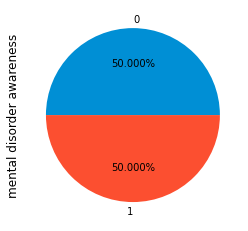

In [214]:
y_ros.value_counts(normalize=True).plot.pie(autopct="%.3f%%")
print("Baseline Accuracy:", y_ros.value_counts(normalize=True).max())

In [215]:
x_train11, x_test11, y_train11, y_test11 = train_test_split(x_ros, y_ros, test_size =0.20, random_state=42)
from xgboost import XGBClassifier
m = XGBClassifier()
m.fit(x_train11, y_train11)
predict_y = m.predict(x_test11)

print('ROCAUC score:',roc_auc_score(y_test11, predict_y))
print('Accuracy score:',accuracy_score(y_test11, predict_y))
print('F1 score:',f1_score(y_test11, predict_y))

ROCAUC score: 0.7772818348953946
Accuracy score: 0.7754746222394421
F1 score: 0.7926283771694399


In [216]:
watchlist = [(x_train11, y_train11), (x_test11, y_test11)]

m.fit(
    x_train11,
    y_train11,
    eval_set=watchlist,
    early_stopping_rounds=50,  
)

[0]	validation_0-error:0.313166	validation_1-error:0.326811
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 50 rounds.
[1]	validation_0-error:0.313166	validation_1-error:0.326811
[2]	validation_0-error:0.312343	validation_1-error:0.32623
[3]	validation_0-error:0.299264	validation_1-error:0.314994
[4]	validation_0-error:0.298876	validation_1-error:0.314026
[5]	validation_0-error:0.295776	validation_1-error:0.309957
[6]	validation_0-error:0.294468	validation_1-error:0.30957
[7]	validation_0-error:0.294129	validation_1-error:0.308795
[8]	validation_0-error:0.294129	validation_1-error:0.308795
[9]	validation_0-error:0.294274	validation_1-error:0.30957
[10]	validation_0-error:0.289479	validation_1-error:0.305308
[11]	validation_0-error:0.280227	validation_1-error:0.294653
[12]	validation_0-error:0.28042	validation_1-error:0.295428
[13]	validation_0-error:0.278144	validation_1-error:0.290973

XGBClassifier()

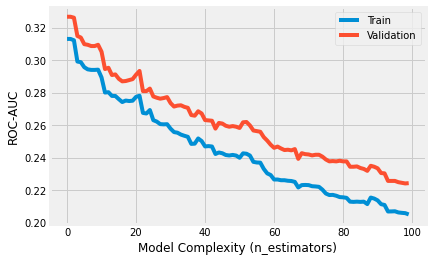

In [217]:
import matplotlib.pyplot as plt

results = m.evals_result()
train_error = results["validation_0"]["error"]
val_error = results["validation_1"]["error"]

plt.plot(train_error, label="Train")
plt.plot(val_error, label="Validation")
plt.ylabel("ROC-AUC")
plt.xlabel("Model Complexity (n_estimators)")
plt.legend()

In [218]:
from sklearn.metrics import classification_report
print("valid accuracy", m.score(x_test11, y_test11))
print(classification_report(y_test11, predict_y))

valid accuracy 0.7756683456024797
              precision    recall  f1-score   support

           0       0.85      0.68      0.76      2629
           1       0.72      0.87      0.79      2533

    accuracy                           0.78      5162
   macro avg       0.79      0.78      0.77      5162
weighted avg       0.79      0.78      0.77      5162



Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


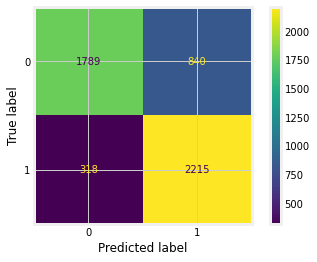

In [219]:
from sklearn.metrics import confusion_matrix
plot_confusion_matrix(m, x_test11, y_test11)

In [220]:
fpr, tpr, thresholds = roc_curve(y_test11, predict_y)
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=1.000000, G-mean=0.771


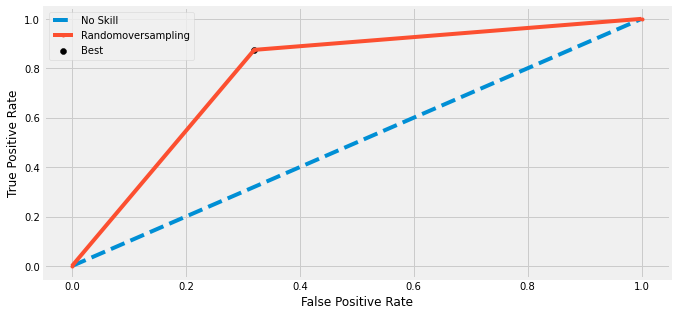

In [221]:
plt.figure(figsize=(10,5))
plt.plot([0,1], [0,1], linestyle='--', label='No Skill') 

plt.plot(fpr, tpr, marker='.', label='Randomoversampling') 
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best') 
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [222]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, f1_score
precision, recall, thresholds = precision_recall_curve(y_test11, predict_y)

#Calculate f-Score
fscore = (2 * precision * recall) / (precision + recall)

# locate the index of the largest g-mean
ix = np.argmax(fscore)

print('Best Threshold=%f, G-mean=%.3f' % (thresholds[ix], fscore[ix]))

Best Threshold=1.000000, G-mean=0.793


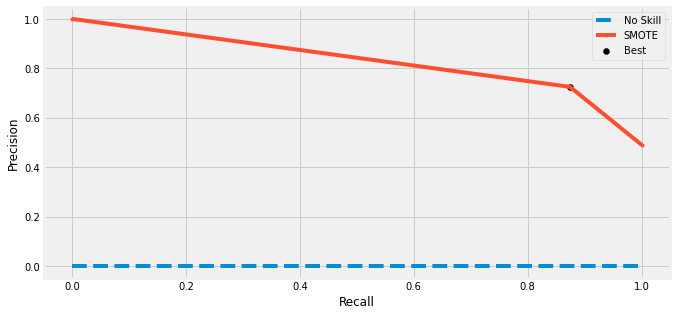

In [223]:
no_skill = len([y_test11==1]) / len(y_test11)

plt.figure(figsize=(10,5))
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill') 
plt.plot(recall, precision, marker='.', label='SMOTE') 
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best') 
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

In [224]:
import eli5
from eli5.sklearn import PermutationImportance
from eli5 import show_weights

perm = PermutationImportance(m, scoring="balanced_accuracy", n_iter=5, random_state=2)
perm.fit(x_test11, y_test11)
show_weights(perm, feature_names=x_test11.columns.tolist())

Weight,Feature
0.0790 ± 0.0027,healthcare
0.0703 ± 0.0020,insomnia
0.0629 ± 0.0108,mental health
0.0500 ± 0.0045,depression
0.0380 ± 0.0077,symptoms
0.0327 ± 0.0077,panic attack
0.0196 ± 0.0021,mental illness
0.0186 ± 0.0025,stress
0.0145 ± 0.0033,loneliness
0.0053 ± 0.0016,bereavement


In [225]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


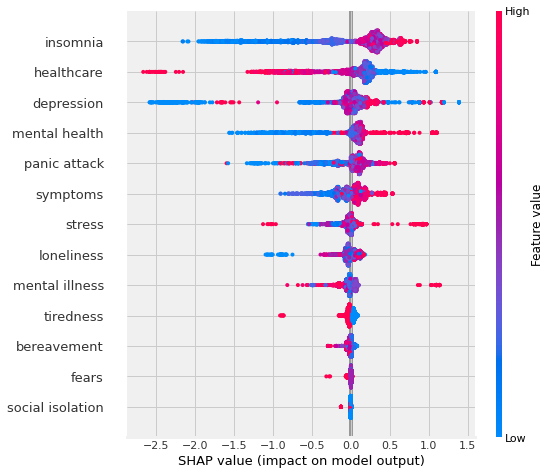

In [226]:
import shap
explainer = shap.TreeExplainer(m)# Tree model Shap Value 확인 객체 지정
shap_values = explainer.shap_values(x_test11)
shap.summary_plot(shap_values, x_test11)

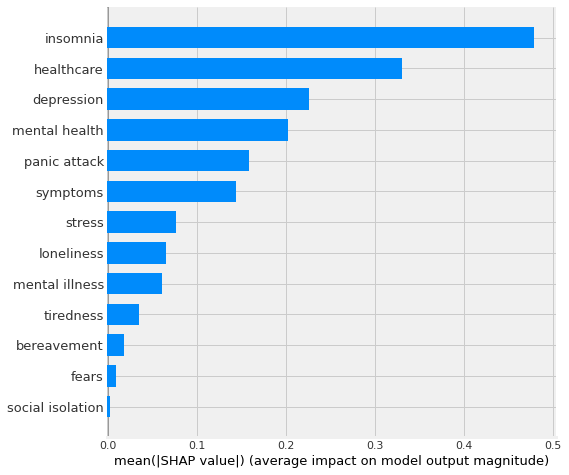

In [227]:
shap.summary_plot(shap_values, x_test11, plot_type = "bar")

In [228]:
shap.initjs() # javascript 초기화 (graph 초기화)
shap.force_plot(explainer.expected_value, shap_values[1,:], x_test11.iloc[1,:])

In [229]:
from imblearn.over_sampling import SMOTE
from collections import Counter
oversample = SMOTE()
X_s, y_s = oversample.fit_resample(X, y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_s))

original dataset shape: Counter({0: 12903, 1: 219})
Resample dataset shape Counter({0: 12903, 1: 12903})


In [230]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(
    RandomForestClassifier(n_jobs=-1, random_state=10, oob_score=True))

scores = cross_val_score(pipe, X_s, y_s, scoring='roc_auc', cv=cv, n_jobs=-1)
x_train11, x_test11, y_train11, y_test11 = train_test_split(X_s, y_s, test_size =0.20, random_state=42)
pipe.fit(x_train11, y_train11)
y_pred = pipe.predict(x_test11)
print('valid accuracy: ', accuracy_score(y_test11, y_pred))
print('Mean ROC AUC: %.3f' % np.mean(scores))

valid accuracy:  0.9839209608678806
Mean ROC AUC: 0.999


In [231]:
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
steps = [('over', SMOTE()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

scores = cross_val_score(pipeline, X_s, y_s, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.954


In [232]:
x_train11, x_test11, y_train11, y_test11 = train_test_split(X_s, y_s, test_size =0.20, random_state=42)
from sklearn.tree import DecisionTreeClassifier
d = DecisionTreeClassifier()
d.fit(x_train11, y_train11)
predict_y = d.predict(x_test11)

print('ROCAUC score:',roc_auc_score(y_test11, predict_y))
print('Accuracy score:',accuracy_score(y_test11, predict_y))
print('F1 score:',f1_score(y_test11, predict_y))

ROCAUC score: 0.9517126310037292
Accuracy score: 0.9511817125145292
F1 score: 0.95170563434266


In [233]:
from sklearn.metrics import classification_report
print(classification_report(y_test11, predict_y))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      2629
           1       0.92      0.98      0.95      2533

    accuracy                           0.95      5162
   macro avg       0.95      0.95      0.95      5162
weighted avg       0.95      0.95      0.95      5162



In [234]:
x_train11, x_test11, y_train11, y_test11 = train_test_split(X_s, y_s, test_size =0.20, random_state=42)
from sklearn.ensemble import RandomForestClassifier
R = RandomForestClassifier()
R.fit(x_train11, y_train11)
predict_y = R.predict(x_test11)

print('ROCAUC score:',roc_auc_score(y_test11, predict_y))
print('Accuracy score:',accuracy_score(y_test11, predict_y))
print('F1 score:',f1_score(y_test11, predict_y))

ROCAUC score: 0.9838801836300958
Accuracy score: 0.983727237504843
F1 score: 0.9835616438356164


In [235]:
from sklearn.metrics import accuracy_score
major = y_train11.mode()[0]
basic_model = [major] * len(y_train11)
print("training accuracy: ", accuracy_score(y_train11, basic_model))

training accuracy:  0.5023251307886069


In [236]:
fpr, tpr, thresholds = roc_curve(y_test11, predict_y)
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=1.000000, G-mean=0.984


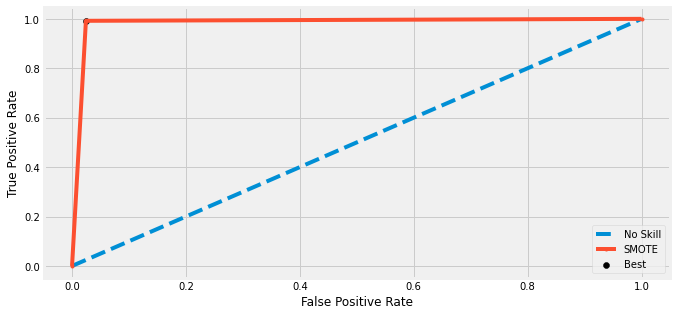

In [237]:
plt.figure(figsize=(10,5))
plt.plot([0,1], [0,1], linestyle='--', label='No Skill') 

plt.plot(fpr, tpr, marker='.', label='SMOTE') 
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best') 
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [238]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, f1_score
precision, recall, thresholds = precision_recall_curve(y_test11, predict_y)

#Calculate f-Score
fscore = (2 * precision * recall) / (precision + recall)

# locate the index of the largest g-mean
ix = np.argmax(fscore)

print('Best Threshold=%f, G-mean=%.3f' % (thresholds[ix], fscore[ix]))

Best Threshold=1.000000, G-mean=0.984


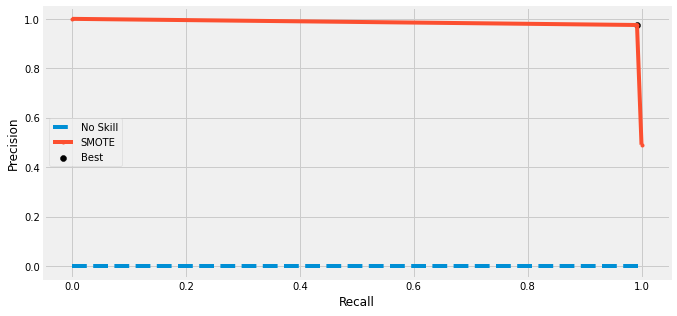

In [239]:
no_skill = len([y_test11==1]) / len(y_test11)

plt.figure(figsize=(10,5))
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill') 
plt.plot(recall, precision, marker='.', label='SMOTE') 
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best') 
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

In [240]:
from sklearn.metrics import classification_report
print(classification_report(y_test11, predict_y))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2629
           1       0.98      0.99      0.98      2533

    accuracy                           0.98      5162
   macro avg       0.98      0.98      0.98      5162
weighted avg       0.98      0.98      0.98      5162



In [241]:
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=0)
X_r, y_r = smote_tomek.fit_resample(X, y)
print(sorted(Counter(y_r).items()))


[(0, 12902), (1, 12902)]


Baseline Accuracy: 0.5


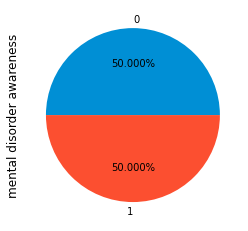

In [242]:
y_r.value_counts(normalize=True).plot.pie(autopct="%.3f%%")
print("Baseline Accuracy:", y_r.value_counts(normalize=True).max())

In [243]:

model =XGBClassifier(
    eval_metric="auc",
    random_state=42,
    n_jobs=-1,
    max_depth=5,
    learning_rate=0.1,
    scale_pos_weight=(y == 0).sum() / (y == 1).sum())

x_train11, x_test11, y_train11, y_test11 = train_test_split(X_r, y_r, test_size =0.20, random_state=42)
mp = model.fit(x_train11, y_train11)
y_pred = model.predict(x_test11)

print('ROCAUC score:',roc_auc_score(y_test11, y_pred))
print('Accuracy score:',accuracy_score(y_test11, y_pred))
print('F1 score:',f1_score(y_test11, y_pred))

ROCAUC score: 0.7624628210905813
Accuracy score: 0.7583801588839372
F1 score: 0.8025336500395883


In [244]:
watchlist = [(x_train11, y_train11), (x_test11, y_test11)]

model.fit(
    x_train11,
    y_train11,
    eval_set=watchlist,
    early_stopping_rounds=50,  # 50 rounds 동안 성능 개선이 없으면 학습을 중지합니다.
)

[0]	validation_0-auc:0.605775	validation_1-auc:0.600677
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.611358	validation_1-auc:0.606298
[2]	validation_0-auc:0.655223	validation_1-auc:0.648549
[3]	validation_0-auc:0.656637	validation_1-auc:0.648979
[4]	validation_0-auc:0.74549	validation_1-auc:0.738966
[5]	validation_0-auc:0.745498	validation_1-auc:0.738963
[6]	validation_0-auc:0.746711	validation_1-auc:0.73991
[7]	validation_0-auc:0.756651	validation_1-auc:0.747723
[8]	validation_0-auc:0.757901	validation_1-auc:0.749377
[9]	validation_0-auc:0.758536	validation_1-auc:0.75004
[10]	validation_0-auc:0.768223	validation_1-auc:0.759769
[11]	validation_0-auc:0.768811	validation_1-auc:0.761701
[12]	validation_0-auc:0.776296	validation_1-auc:0.767847
[13]	validation_0-auc:0.782097	validation_1-auc:0.773978
[14]	validation_0-auc:0.784162	validation_1-auc:0.775472
[

XGBClassifier(eval_metric='auc', max_depth=5, n_jobs=-1, random_state=42,
              scale_pos_weight=58.917808219178085)

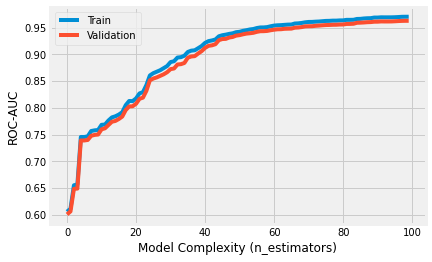

In [245]:
import matplotlib.pyplot as plt

results = model.evals_result()
train_error = results["validation_0"]["auc"]
val_error = results["validation_1"]["auc"]

plt.plot(train_error, label="Train")
plt.plot(val_error, label="Validation")
plt.ylabel("ROC-AUC")
plt.xlabel("Model Complexity (n_estimators)")
plt.legend()

In [246]:
from sklearn.metrics import classification_report

print("검증 정확도", model.score(x_test11, y_test11))

print(
    classification_report(y_test11, model.predict(x_test11)
    )
)

검증 정확도 0.7583801588839372
              precision    recall  f1-score   support

           0       1.00      0.53      0.69      2625
           1       0.67      1.00      0.80      2536

    accuracy                           0.76      5161
   macro avg       0.83      0.76      0.75      5161
weighted avg       0.84      0.76      0.74      5161



Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


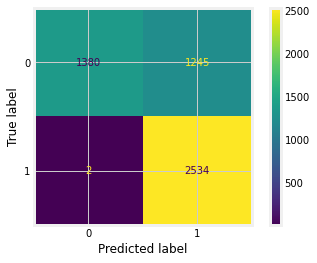

In [247]:
from sklearn.metrics import confusion_matrix
plot_confusion_matrix(model, x_test11, y_test11)

In [248]:
import eli5
from eli5.sklearn import PermutationImportance

In [249]:
import eli5
from eli5.sklearn import PermutationImportance
from eli5 import show_weights

perm = PermutationImportance(model, scoring="balanced_accuracy", n_iter=5, random_state=2)
perm.fit(x_test11, y_test11)
show_weights(perm, feature_names=x_test11.columns.tolist())

Weight,Feature
0.0408 ± 0.0051,insomnia
0.0326 ± 0.0040,healthcare
0.0207 ± 0.0059,symptoms
0.0175 ± 0.0026,tiredness
0.0152 ± 0.0033,mental health
0.0122 ± 0.0024,panic attack
0.0100 ± 0.0034,fears
0.0094 ± 0.0062,depression
0.0087 ± 0.0031,social isolation
0.0075 ± 0.0044,loneliness


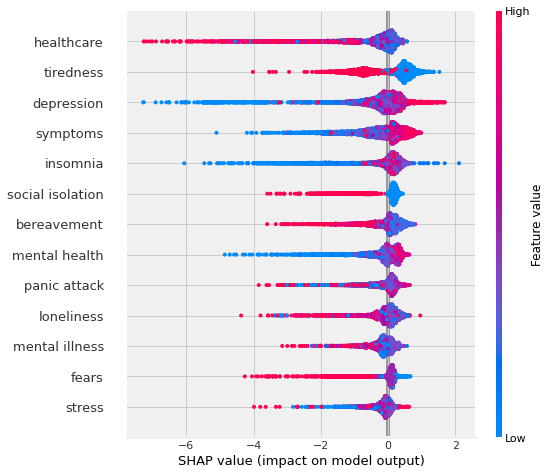

In [250]:
import shap
explainer = shap.TreeExplainer(mp)# Tree model Shap Value 확인 객체 지정
shap_values = explainer.shap_values(x_test11)
shap.summary_plot(shap_values, x_test11)

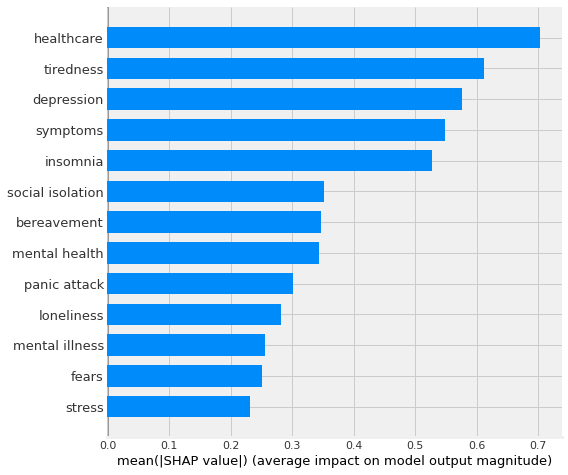

In [251]:
shap.summary_plot(shap_values, x_test11, plot_type = "bar")

In [252]:
shap.initjs() # javascript 초기화 (graph 초기화)
shap.force_plot(explainer.expected_value, shap_values[1,:], x_test11.iloc[1,:])